In [6]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
import pickle
import os

In [11]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score,classification_report,confusion_matrix

In [9]:
carpeta_actual = os.getcwd()

directorio = os.path.dirname(carpeta_actual)
ruta_archivo = os.path.join(directorio, 'preprocessing','resultado_df.pkl')

df=pickle.load(open(ruta_archivo, "rb"))
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,3,1,0,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,5,7,1,3,1,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,2,0,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,4,0,1,1,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,5,7,1,3,2,2,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,3,0,1,6,2,0,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41182,2,10,2,0,2,0,2,0,7,0,...,1,9,1,1,-1.1,94.767,-50.8,1.028,4963.6,0
41184,4,1,1,5,2,2,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,5,5,1,6,2,0,2,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40714 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40714 non-null  object 
 1   job             40714 non-null  int32  
 2   marital         40714 non-null  int32  
 3   education       40714 non-null  int32  
 4   default         40714 non-null  int64  
 5   housing         40714 non-null  int64  
 6   loan            40714 non-null  int64  
 7   contact         40714 non-null  int32  
 8   month           40714 non-null  int32  
 9   day_of_week     40714 non-null  int32  
 10  duration        40714 non-null  int64  
 11  campaign        40714 non-null  int64  
 12  pdays           40714 non-null  int64  
 13  previous        40714 non-null  int64  
 14  poutcome        40714 non-null  int64  
 15  emp.var.rate    40714 non-null  float64
 16  cons.price.idx  40714 non-null  float64
 17  cons.conf.idx   40714 non-null 

In [13]:
X = df.drop('y', axis=1).values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

g_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  
                  #Parametros
                  param_grid = {
                              'max_features': [3,4,5,6],
                              'n_estimators': [50,100,200,250 ,300,350],
                              'criterion':('gini','entropy')
                          },                 
                  #Metrica
                  scoring='accuracy',

                  # Numero de grupos para cv
                  cv=5,
                  
                  n_jobs=-1                  
                  )

In [15]:
gs_rf=g_rf.fit(X_train, y_train)

In [16]:
gs_rf.best_params_

{'criterion': 'entropy', 'max_features': 3, 'n_estimators': 200}

In [17]:
model_rf_GSearch = RandomForestClassifier(random_state=42, n_estimators=200, max_features=5,criterion='entropy')
model_rf_GSearch.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=200,
                       random_state=42)

In [18]:
#Accuracy
print("Accuracy training tunning: {:.2f}%".format(gs_rf.best_score_ *100))

Accuracy training tunning: 91.21%


In [19]:
from sklearn.metrics import f1_score, accuracy_score

y_test_gridRF=model_rf_GSearch.predict(X_test) 

print("accuracy_score testing tuning: {:.2f}%".format(accuracy_score(y_test,y_test_gridRF)*100) )
print("F1_Score testing tuning: {:.2f}%".format(f1_score(y_test,y_test_gridRF)*100) )

accuracy_score testing tuning: 90.82%
F1_Score testing tuning: 52.64%


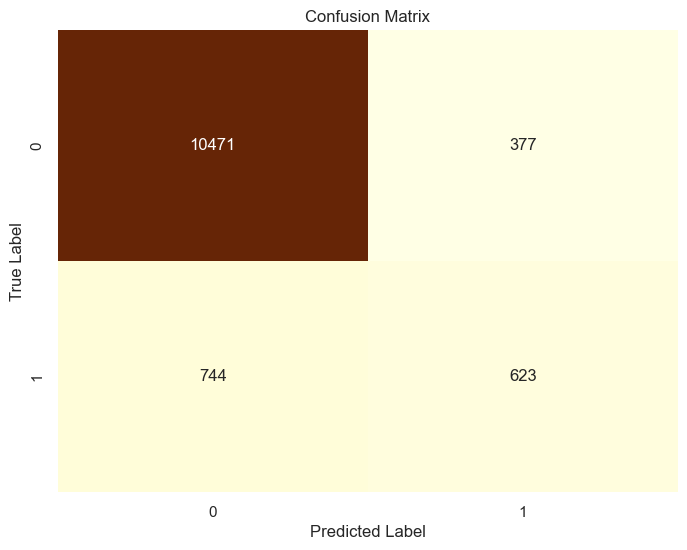

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def Matriz_Confusion(y_pred):
    sns.set(font_scale=1)
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False, ax=ax)  # Usar 'fmt=d' para mostrar números sin notación científica
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')

    plt.show()

Matriz_Confusion(y_test_gridRF)
